In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


books = pd.read_csv("./resources/Books.csv")



books

,Unnamed: 0,Title,Author,Rating Count,Review Count,Rating Value,N pag,1st Pub,series,Genres,Awards,minmax_norm_ratings,mean_norm_ratings,Link
0,0,To Kill a Mockingbird,Harper Lee,4629082,92962,4.28,324.0,1960.0,1,"['Classics', 'Fiction', 'Historical']",4.0,7.705,2.330,https://www.goodreads.com/book/show/2657.To_Ki...
1,1,1984,George Orwell,3250211,72375,4.19,237.0,1949.0,0,"['Classics', 'Fiction', 'Science Fiction']",2.0,7.161,1.787,https://www.goodreads.com/book/show/40961427-1984
2,2,The Great Gatsby,F. Scott Fitzgerald,3877685,68965,3.93,200.0,1925.0,0,"['Classics', 'Fiction', 'Academic']",1.0,5.591,0.216,https://www.goodreads.com/book/show/3.Harry_Po...
3,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,7281482,115354,4.48,309.0,1997.0,1,"['Fantasy', 'Fiction', 'Young Adult']",28.0,8.913,3.538,https://www.goodreads.com/book/show/4671.The_G...
4,4,"The Hobbit, or There and Back Again",J.R.R. Tolkien,2973224,49547,4.28,366.0,1937.0,1,"['Fantasy', 'Classics', 'Fiction']",3.0,7.705,2.330,https://www.goodreads.com/book/show/170448.Ani...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,991,The Snows of Kilimanjaro and Other Stories,Ernest Hemingway,33823,1453,3.87,144.0,1961.0,0,"['Fiction', 'Short Stories', 'Classics']",NaN,5.228,-0.146,https://www.goodreads.com/book/show/244261.The...
992,992,The Street of Crocodiles,Bruno Schulz,7034,599,4.13,160.0,1933.0,0,"['Fiction', 'Short Stories', 'European Literat...",2.0,6.799,1.424,https://www.goodreads.com/book/show/4645.The_S...
993,993,Riddley Walker,Russell Hoban,7075,819,4.02,256.0,1980.0,0,"['Fiction', 'Science Fiction', 'Apocalyptic']",3.0,6.134,0.760,https://www.goodreads.com/book/show/428.Play_I...
994,994,Play It As It Lays,Joan Didion,29879,2278,3.88,231.0,1970.0,0,"['Fiction', 'Classics', 'Novels']",NaN,5.289,-0.086,https://www.goodreads.com/book/show/776573.Rid...


In [15]:
max_rating = books['Rating Value'].max()
min_rating = books['Rating Value'].min()
range_of_ratings = max_rating - min_rating

books['minmax_norm_ratings'] = round(1 + 9*((books['Rating Value'] - min_rating)/range_of_ratings) , 3)

mean_rating = books['Rating Value'].mean()

books['mean_norm_ratings'] = round(1 + 9*((books['Rating Value'] - mean_rating)/range_of_ratings) , 3)

In [16]:
dr = books[["Title", "1st Pub", 'minmax_norm_ratings']]
dr

,Title,1st Pub,minmax_norm_ratings
0,To Kill a Mockingbird,1960.0,7.705
1,1984,1949.0,7.161
2,The Great Gatsby,1925.0,5.591
3,Harry Potter and the Sorcerer's Stone,1997.0,8.913
4,"The Hobbit, or There and Back Again",1937.0,7.705
...,...,...,...
991,The Snows of Kilimanjaro and Other Stories,1961.0,5.228
992,The Street of Crocodiles,1933.0,6.799
993,Riddley Walker,1980.0,6.134
994,Play It As It Lays,1970.0,5.289


In [17]:
print(books['minmax_norm_ratings'])

0      7.705
1      7.161
2      5.591
3      8.913
4      7.705
       ...  
991    5.228
992    6.799
993    6.134
994    5.289
995    6.376
Name: minmax_norm_ratings, Length: 996, dtype: float64


In [18]:
dyear = dr.groupby("1st Pub").agg({"minmax_norm_ratings": [lambda x: np.mean(x)]})
dyear.columns = ["Mean of norm ratings"]

dyear['publishing year'] = dyear.index

#dyear = dyear.style.hide_index()

dyear = dyear.reset_index(drop=True)

#books['1st Pub'] = books['1st Pub'].astype(int)

dyear

,Mean of norm ratings,publishing year
0,3.718000,1900.0
1,6.134333,1901.0
2,6.557000,1902.0
3,6.517000,1903.0
4,5.167500,1904.0
...,...,...
97,6.169955,1998.0
98,6.220476,1999.0
99,6.299579,2000.0
100,4.564000,2001.0


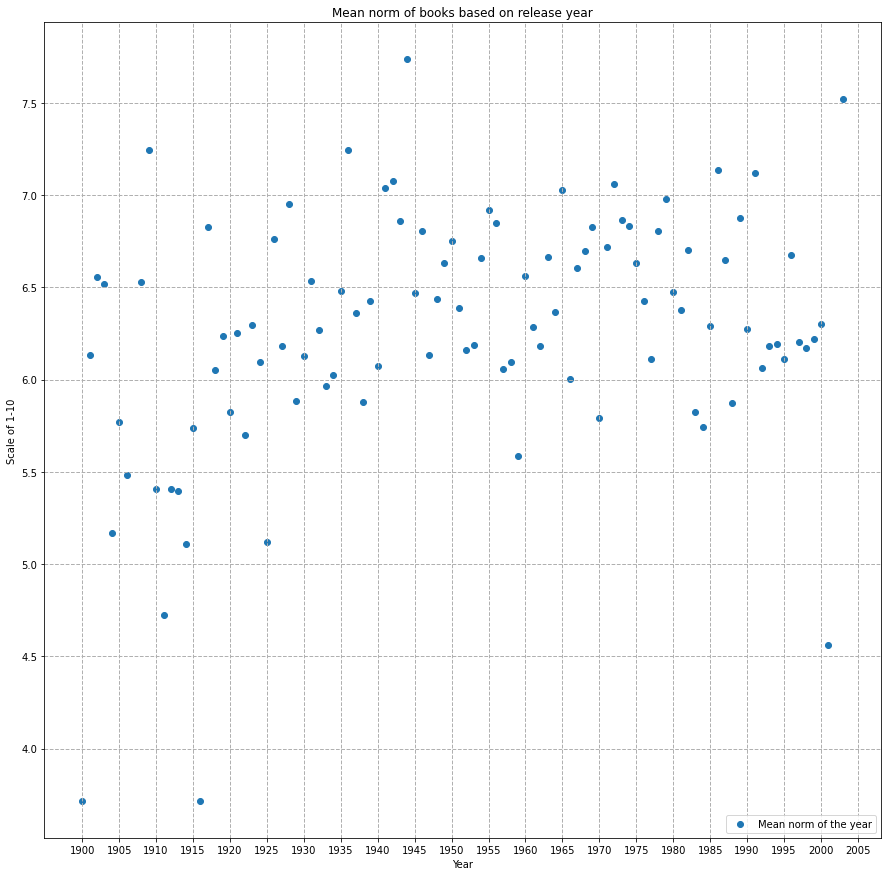

In [19]:
#pubyear = dr["1st Pub"].tolist()
#meannorm = books['minmax_norm_ratings'].tolist()


pubyear = dyear["publishing year"].tolist()
meannorm = dyear["Mean of norm ratings"].tolist()


plt.figure(figsize = (15,15))
plt.scatter(pubyear, meannorm, label = "Mean norm of the year")
plt.xlabel('Year')
plt.ylabel('Scale of 1-10')
plt.legend(loc='lower right')
plt.title('Mean norm of books based on release year')
plt.grid(True, linewidth= 1, linestyle="--")

plt.xticks(np.arange(1900, 2010, step=5))


plt.savefig('nameoftheplot.jpg')

plt.show()

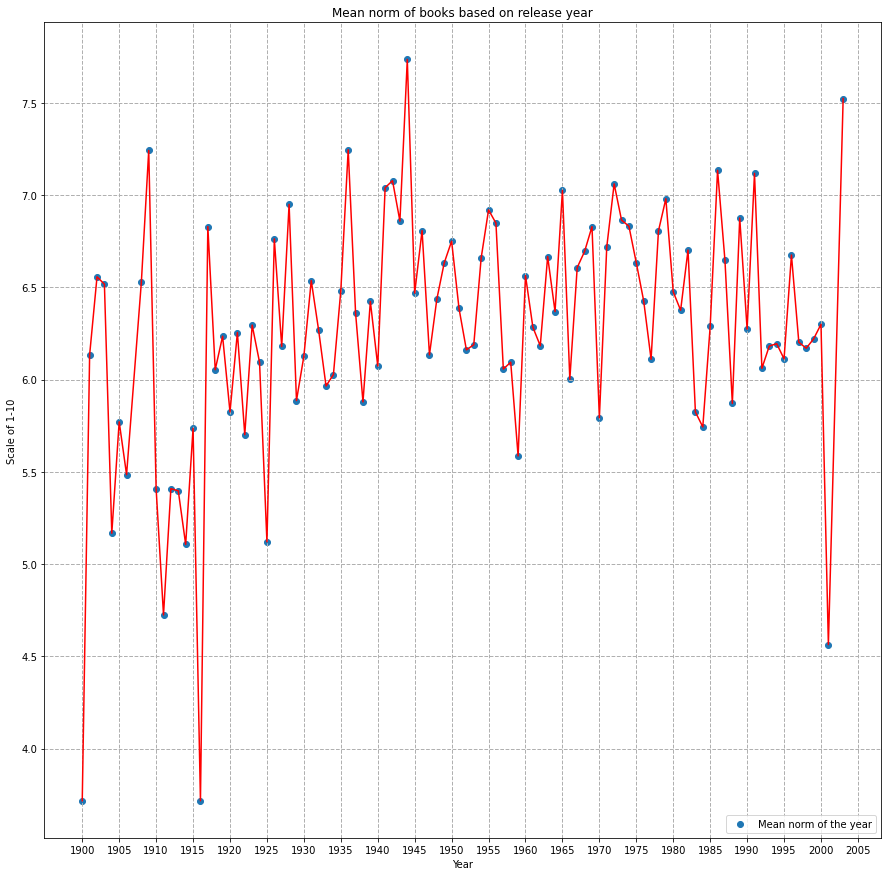

In [20]:
pubyear = dyear["publishing year"].tolist()
meannorm = dyear["Mean of norm ratings"].tolist()


plt.figure(figsize = (15,15))
plt.scatter(pubyear, meannorm, label = "Mean norm of the year")
plt.plot(pubyear, meannorm, color='red')
plt.xlabel('Year')
plt.ylabel('Scale of 1-10')
plt.legend(loc='lower right')
plt.title('Mean norm of books based on release year')
plt.grid(True, linewidth= 1, linestyle="--")

plt.xticks(np.arange(1900, 2010, step=5))

plt.savefig('nameoftheplot2.jpg')

plt.show()

In [76]:
import scipy.stats as st
import statsmodels as sm
import seaborn

avg_rating = books["Rating Value"].tolist()
minmax_norm_rating = books["minmax_norm_ratings"].tolist()
mean_norm_rating = books["mean_norm_ratings"].tolist()




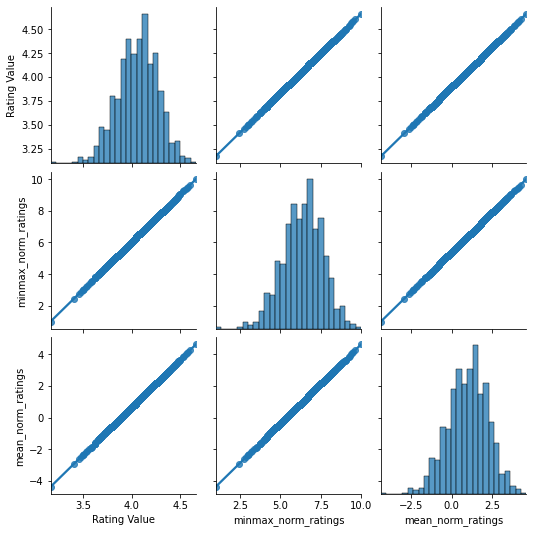

In [30]:
seaborn.pairplot(books, vars=('Rating Value', 'minmax_norm_ratings', 'mean_norm_ratings'), kind='reg')

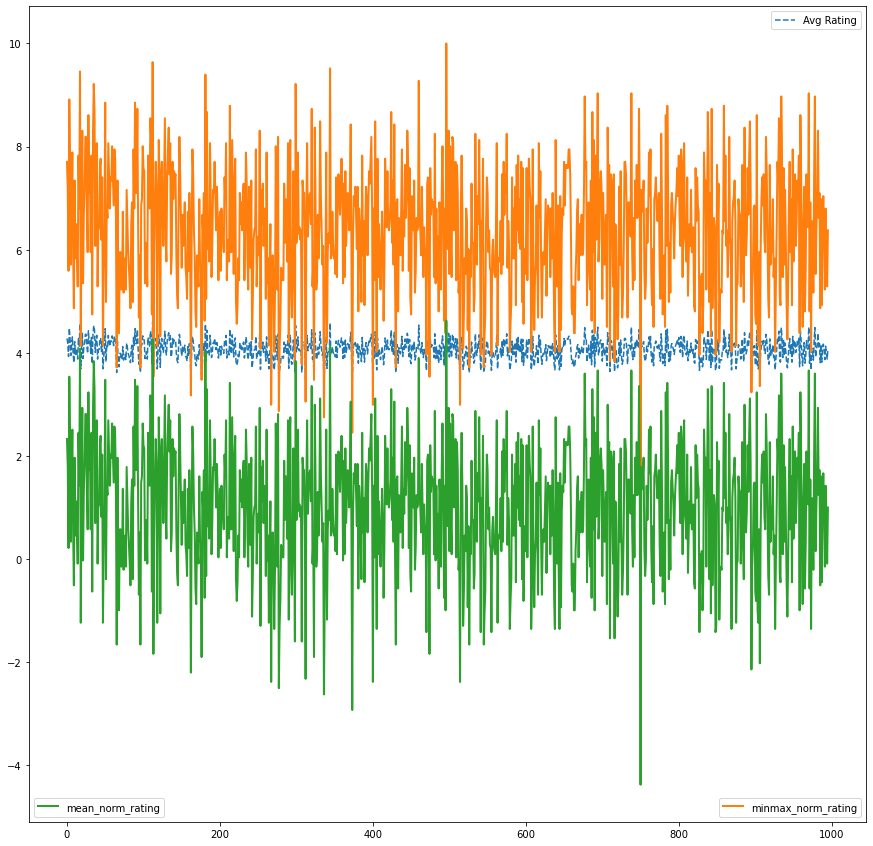

In [71]:


line1, = plt.plot(avg_rating, label="Avg Rating", linestyle='--')
line2, = plt.plot(minmax_norm_rating, label="minmax_norm_rating", linewidth=2)
line3, = plt.plot(mean_norm_rating, label="mean_norm_rating", linewidth=2)


first_legend = plt.legend(handles=[line1], loc='upper right')
second_legend = plt.legend(handles=[line2], loc='lower right')

ax = plt.gca().add_artist(first_legend)
ay = plt.gca().add_artist(second_legend)
plt.legend(handles=[line3], loc='lower left')

plt.show()

(array([  1.,   2.,  12.,  65., 154., 257., 272., 178.,  47.,   8.]),
 array([-4.374, -3.474, -2.574, -1.674, -0.774,  0.126,  1.026,  1.926,
         2.826,  3.726,  4.626]),
 <BarContainer object of 10 artists>)

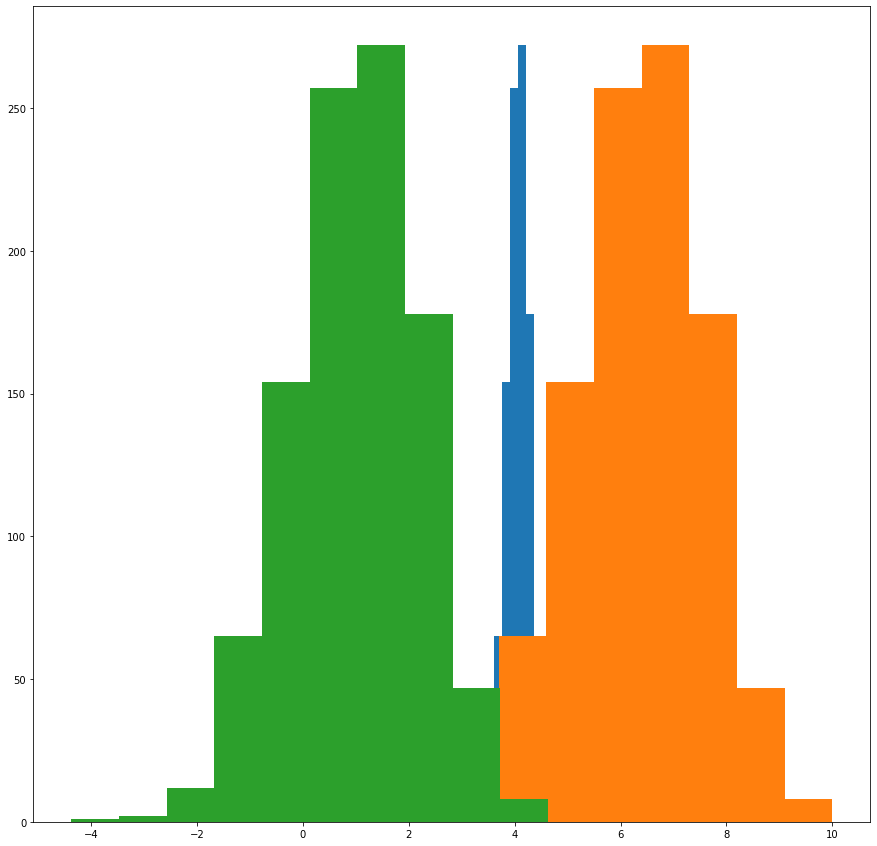

In [72]:

plt.figure(figsize = (15,15))
plt.hist(avg_rating)
plt.hist(minmax_norm_rating)
plt.hist(mean_norm_rating)

In [83]:

st.stats.chisquare(books["Rating Value"])

ModuleNotFoundError: No module named 'distfit'

In [88]:
#!pip install statsmodels
#!pip install distfit
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy
import scipy.stats as st
from distfit import distfit

In [89]:
data = books["minmax_norm_ratings"]

[distfit] >fit..
[distfit] >transform..
[smoothline] >Smoothing by interpolation..
[distfit] >[norm      ] [RSS: 0.0153135] [loc=6.374 scale=1.235] 
[distfit] >[expon     ] [RSS: 0.8881359] [loc=1.000 scale=5.374] 
[distfit] >[pareto    ] [RSS: 0.8944523] [loc=-93583774.901 scale=93583775.901] 
[distfit] >[dweibull  ] [RSS: 0.0395142] [loc=6.337 scale=1.071] 
[distfit] >[t         ] [RSS: 0.0168758] [loc=6.379 scale=1.212] 
[distfit] >[genextreme] [RSS: 0.0078507] [loc=5.946 scale=1.272] 
[distfit] >[gamma     ] [RSS: 0.0189123] [loc=-18.226 scale=0.064] 
[distfit] >[lognorm   ] [RSS: 0.0165452] [loc=-223.208 scale=229.578] 
[distfit] >[beta      ] [RSS: 0.0087581] [loc=-1659042.298 scale=1659057.590] 
[distfit] >[uniform   ] [RSS: 0.5525509] [loc=1.000 scale=9.000] 
[distfit] >Compute confidence interval [parametric]
{'distr': <scipy.stats._continuous_distns.genextreme_gen object at 0x000001A28BCC3760>, 'params': (0.30149612336799425, 5.945537091928044, 1.2720670859342675), 'name': 'g

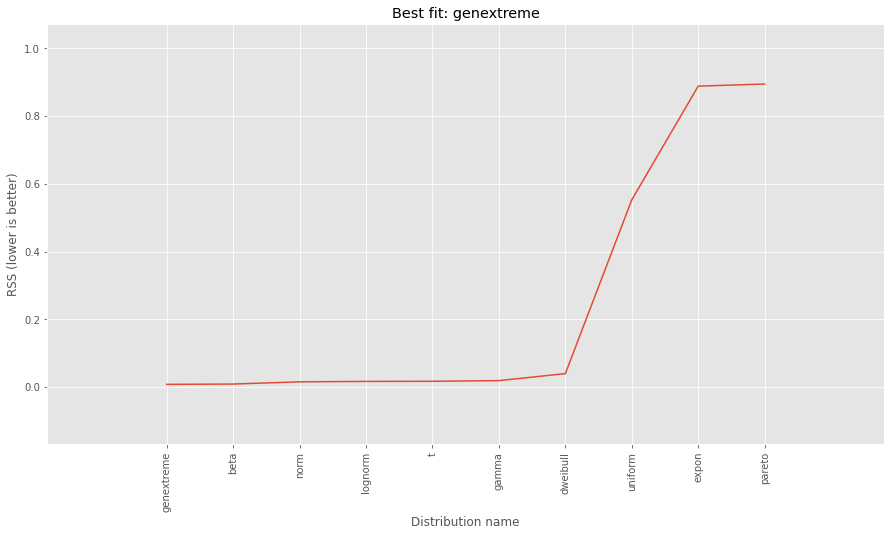

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: genextreme'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

In [92]:
X = data
y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

dist = distfit(alpha=0.05, smooth=10)

# Search for best theoretical fit on your empirical data
dist.fit_transform(data)



# Best fitted model
best_distr = dist.model
print(best_distr)


# Ranking distributions
dist.summary

# Plot the summary of fitted distributions
dist.plot_summary()

[distfit] >predict..
[distfit] >Multiple test correction..[fdr_bh]
[distfit] >plot..


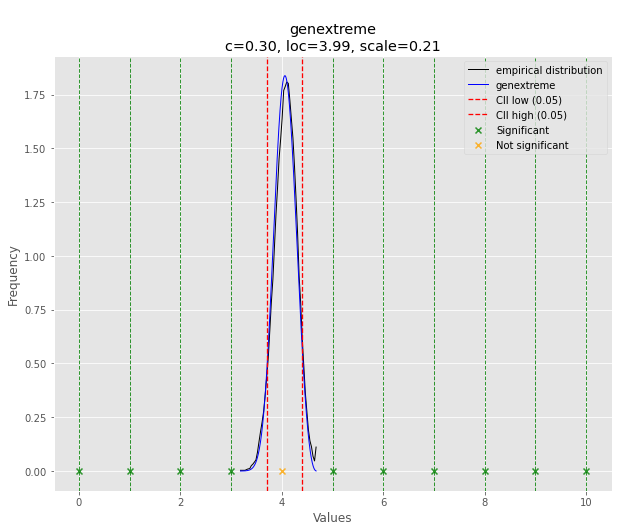

<Figure size 432x288 with 0 Axes>

In [155]:
# Make prediction on new datapoints based on the fit
dist.predict(y)

# Retrieve your pvalues with 
dist.y_pred
# array(['down', 'none', 'none', 'up', 'up'], dtype='<U4')
dist.y_proba
np.array([0.02040816, 0.02040816, 0.02040816, 0.        , 0.        ])

# Or in one dataframe
dist.df

# The plot function will now also include the predictions of y
dist.plot()

plt.savefig('bestfit_minmax_norm.jpg')

In [94]:
data2 = books["mean_norm_ratings"]

[distfit] >fit..
[distfit] >transform..
[smoothline] >Smoothing by interpolation..
[distfit] >[norm      ] [RSS: 0.0153437] [loc=1.000 scale=1.235] 
[distfit] >[expon     ] [RSS: 0.8881608] [loc=-4.374 scale=5.374] 
[distfit] >[pareto    ] [RSS: 1.3880511] [loc=-5.723 scale=1.349] 
[distfit] >[dweibull  ] [RSS: 0.0503785] [loc=0.912 scale=1.080] 
[distfit] >[t         ] [RSS: 0.0169083] [loc=1.005 scale=1.212] 
[distfit] >[genextreme] [RSS: 0.0078657] [loc=0.571 scale=1.272] 
[distfit] >[gamma     ] [RSS: 0.0184758] [loc=-23.016 scale=0.065] 
[distfit] >[lognorm   ] [RSS: 0.0167419] [loc=-188.908 scale=189.902] 
[distfit] >[beta      ] [RSS: 0.0087715] [loc=-1660674.712 scale=1660684.623] 
[distfit] >[uniform   ] [RSS: 0.5525509] [loc=-4.374 scale=9.000] 
[distfit] >Compute confidence interval [parametric]
{'distr': <scipy.stats._continuous_distns.genextreme_gen object at 0x000001A28BCC3760>, 'params': (0.30151029280541297, 0.5713404920738683, 1.2720807469060633), 'name': 'genextreme',

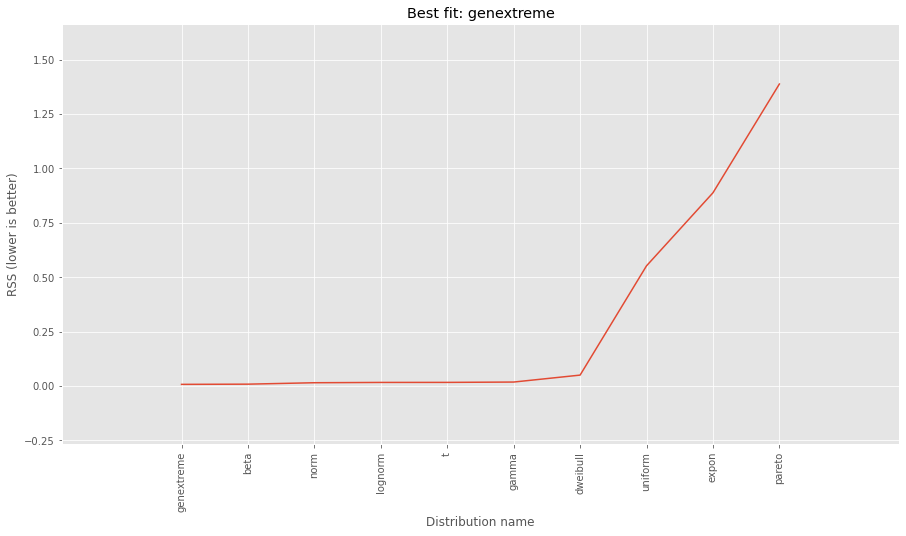

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: genextreme'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

In [95]:
X = data2

# Retrieve P-value for y
y = [0,1,2,3,4,5,6,7,8,9,10]


# Initialize.
# Set any properties here, such as alpha.
# The smoothing can be of use when working with integers. Otherwise your histogram
# may be jumping up-and-down, and getting the correct fit may be harder.
dist = distfit(alpha=0.05, smooth=10)

# Search for best theoretical fit on your empirical data
dist.fit_transform(X)

# Best fitted model
best_distr = dist.model
print(best_distr)


# Ranking distributions
dist.summary

# Plot the summary of fitted distributions
dist.plot_summary()

[distfit] >predict..
[distfit] >Multiple test correction..[fdr_bh]
[distfit] >plot..


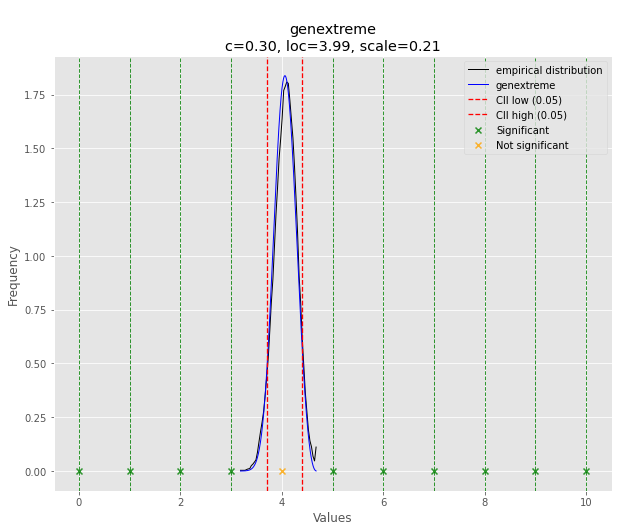

<Figure size 432x288 with 0 Axes>

In [156]:
# Make prediction on new datapoints based on the fit
dist.predict(y)

# Retrieve your pvalues with 
dist.y_pred
# array(['down', 'none', 'none', 'up', 'up'], dtype='<U4')
dist.y_proba
np.array([0.02040816, 0.02040816, 0.02040816, 0.        , 0.        ])

# Or in one dataframe
dist.df

# The plot function will now also include the predictions of y
dist.plot()


plt.savefig('bestfit_mean_norm.jpg')

In [97]:
data3 = books["Rating Value"]

[distfit] >fit..
[distfit] >transform..
[smoothline] >Smoothing by interpolation..
[distfit] >[norm      ] [RSS: 0.5587076] [loc=4.060 scale=0.204] 
[distfit] >[expon     ] [RSS: 32.4035105] [loc=3.170 scale=0.890] 
[distfit] >[pareto    ] [RSS: 35.5821207] [loc=-0.007 scale=3.177] 
[distfit] >[dweibull  ] [RSS: 1.0808578] [loc=4.074 scale=0.176] 
[distfit] >[t         ] [RSS: 0.6156876] [loc=4.061 scale=0.201] 
[distfit] >[genextreme] [RSS: 0.2865178] [loc=3.989 scale=0.211] 
[distfit] >[gamma     ] [RSS: 0.6858641] [loc=-0.003 scale=0.011] 
[distfit] >[lognorm   ] [RSS: 0.6014328] [loc=-49.194 scale=53.253] 
[distfit] >[beta      ] [RSS: 0.3205423] [loc=-274692.100 scale=274697.636] 
[distfit] >[uniform   ] [RSS: 20.1597346] [loc=3.170 scale=1.490] 
[distfit] >Compute confidence interval [parametric]
{'distr': <scipy.stats._continuous_distns.genextreme_gen object at 0x000001A28BCC3760>, 'params': (0.3014889288523249, 3.988772758021647, 0.21057999487067902), 'name': 'genextreme', 'RSS

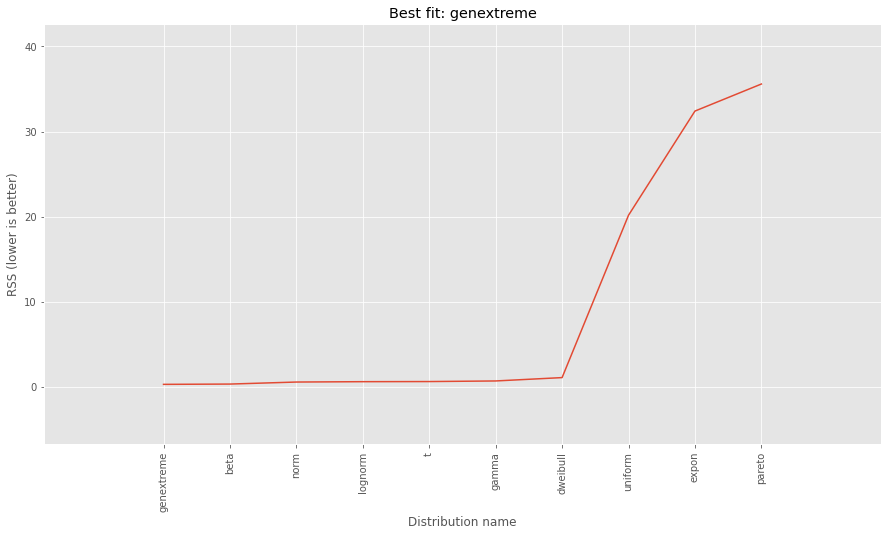

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: genextreme'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

In [98]:
X = data3

# Retrieve P-value for y
y = [0,1,2,3,4,5,6,7,8,9,10]


# Initialize.
# Set any properties here, such as alpha.
# The smoothing can be of use when working with integers. Otherwise your histogram
# may be jumping up-and-down, and getting the correct fit may be harder.
dist = distfit(alpha=0.05, smooth=10)

# Search for best theoretical fit on your empirical data
dist.fit_transform(X)

# Best fitted model
best_distr = dist.model
print(best_distr)

# Ranking distributions
dist.summary

# Plot the summary of fitted distributions
dist.plot_summary()

[distfit] >predict..
[distfit] >Multiple test correction..[fdr_bh]
[distfit] >plot..


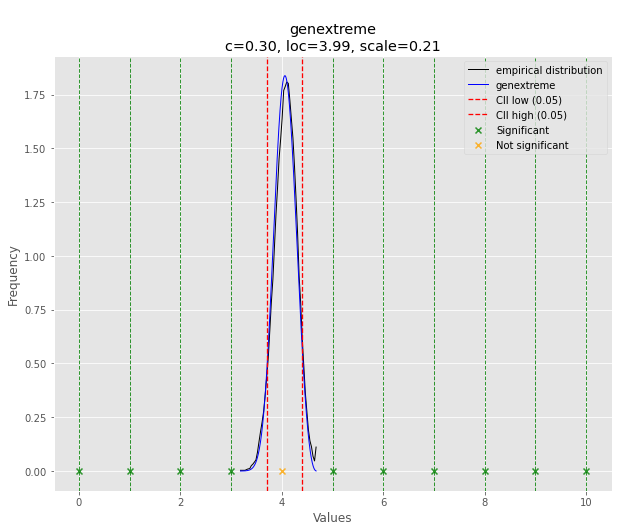

<Figure size 432x288 with 0 Axes>

In [157]:
# Make prediction on new datapoints based on the fit
dist.predict(y)

# Retrieve your pvalues with 
dist.y_pred
# array(['down', 'none', 'none', 'up', 'up'], dtype='<U4')
dist.y_proba
np.array([0.09090909090909091,0.09090909090909091,0.09090909090909091,0.09090909090909091,0.09090909090909091,0.09090909090909091,0.09090909090909091,0.09090909090909091,0.09090909090909091,0.09090909090909091])

# Or in one dataframe
dist.df

# The plot function will now also include the predictions of y
dist.plot()


plt.savefig('bestfit_ratings.jpg')

In [183]:
data_aw = books.groupby('Awards')['Awards'].count()
data_aw

Awards
1.0     237
2.0     118
3.0      60
4.0      43
5.0      24
6.0      25
7.0      15
8.0       8
9.0       4
10.0      2
11.0      3
12.0      1
13.0      3
16.0      2
17.0      1
22.0      3
28.0      1
Name: Awards, dtype: int64

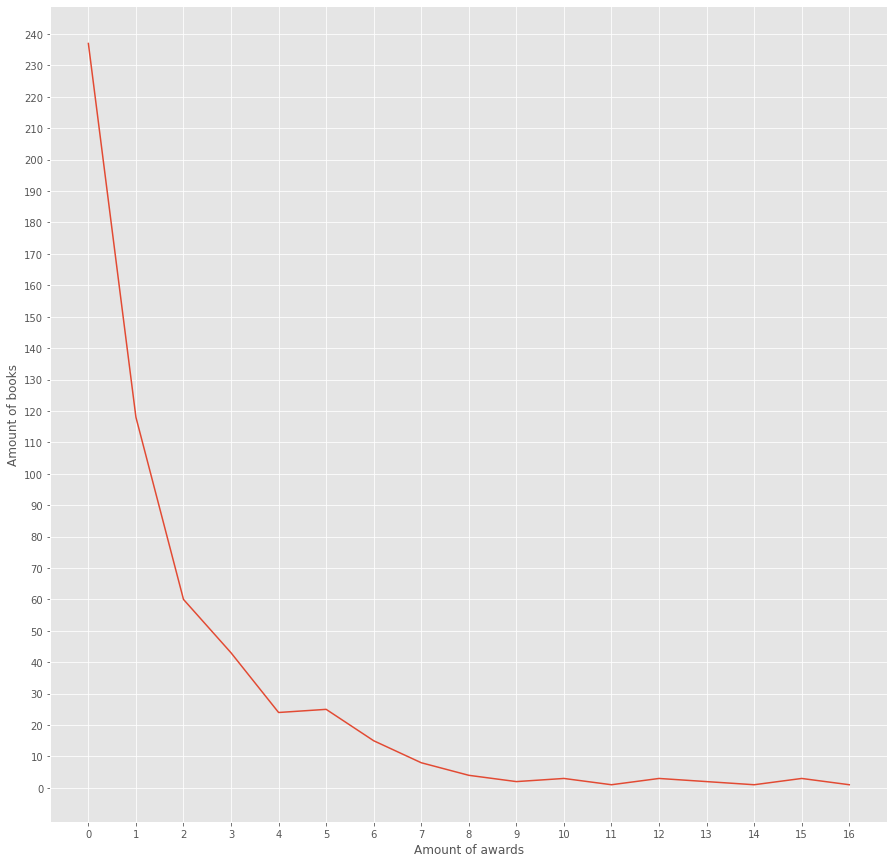

In [184]:
awards = data_aw.tolist()

plt.figure(figsize = (15,15))

plt.xticks(np.arange(0, 30, step=1))
plt.yticks(np.arange(0, 300, step=10))

plt.xlabel('Amount of awards')
plt.ylabel('Amount of books')



plt.plot(awards)

plt.savefig('bookawardsplot.jpg')

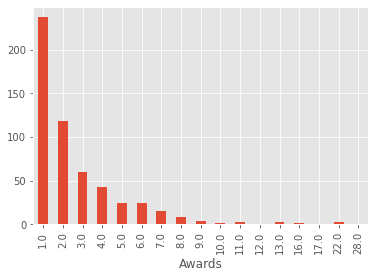

In [185]:
data_aw = books.groupby('Awards')['Awards'].count().transpose().plot(kind='bar')

plt.savefig('bookawards.jpg')

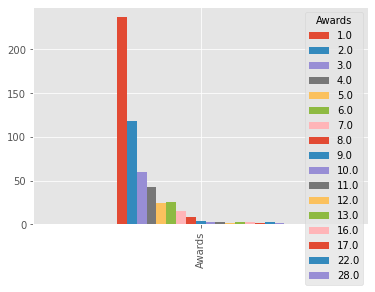

In [190]:
data_aw = books.groupby('Awards').agg({"Awards": np.size}).transpose().plot(kind='bar')

plt.savefig('bookawardscolorful.jpg')

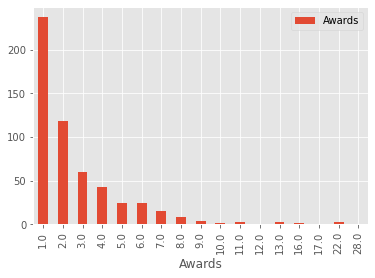

In [188]:
data_aw = books.groupby('Awards').agg({"Awards": np.size}).plot(kind='bar')

In [196]:
data_aw = books.groupby('Awards').agg({"Awards": np.size})
data_aw.columns = ["Amount of books"]
data_aw['Amount of awards'] = data_aw.index

data_aw = data_aw.reset_index(drop=True)

aw = data_aw["Amount of books"]
aa = data_aw['Amount of awards']


data_aw

,Amount of books,Amount of awards
0,237.0,1.0
1,118.0,2.0
2,60.0,3.0
3,43.0,4.0
4,24.0,5.0
5,25.0,6.0
6,15.0,7.0
7,8.0,8.0
8,4.0,9.0
9,2.0,10.0


<BarContainer object of 17 artists>

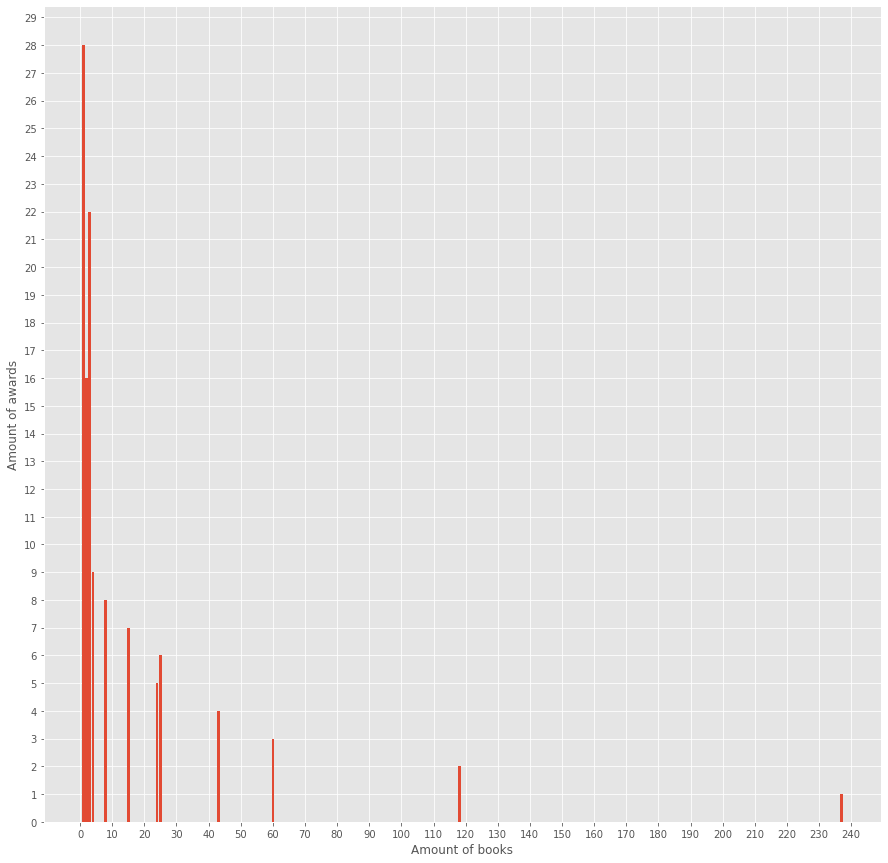

In [200]:
data_aw = books.groupby('Awards')['Awards'].count()
data_aw

awards = data_aw.tolist()

plt.figure(figsize = (15,15))

plt.yticks(np.arange(0, 30, step=1))
plt.xticks(np.arange(0, 300, step=10))

plt.ylabel('Amount of awards')
plt.xlabel('Amount of books')


plt.bar(aw, aa)